# NorthernLion Balatro Exploration
#### Let's take a look at the last 100 Balatro videos and their thumbnails posted by NorthernLion from March-May 2024. Are there any relations between the jokers shown in a thumbnail versus the amount of views the video gets? What about if the length of the video impacts the amount of views it gets? Or if those jokers are chromed up or dipped in Mama Liz's negative chili oil?

I spent like 30 minutes manually collecting this data because I got bored on a Friday morning and was interested in what jokers show up more than others. The jupyter notebook followed pretty quickly. Videos with repeated thumbnails and videos without a Balatro focus were dropped from final analysis. E.g. mainly NL's head, no cards or score or money shown outright.

All CSVs and data stuff can be found in the corresponding folders. Please update the file paths for each function call below if you plan on recreating or messing around with the data yourself. -These were all in the top level folder for this notebook.

## Lets get the csv loaded and poke around with it.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv = pd.read_csv('NL data.csv')
csv

,Title,Length,Balatro Card,Views,negative,polychrome
0,I thought gold stake was supposed to be hard,0:59:05,mecury,65000,1,0
1,all the foil in the world,0:40:14,campfire\spacejoker\vagabond\fortuneteller,30000,1,0
2,this patch was made for me,0:34:40,greenjoker\stuntman\blackboard\madness,60000,0,0
3,it has to work sometime,1:30:54,104\duo,67000,0,1
4,i will never financially recover from this,0:27:07,money,27000,0,0
...,...,...,...,...,...,...
81,bro got double mult multers,0:31:19,trio\duo\stuntman,105000,1,0
82,when your brain glycogen hits zero,0:27:41,turtlebean\abstract\scholar,75000,0,0
83,he called this deck easy,0:28:07,drunkard\raisedfist\swashbuckler,91000,0,0
84,stencil my nemesis,0:44:37,blueprint\stencil,113000,0,0


In [155]:
csv1 = csv
csv1['Balatro Card'] = csv1['Balatro Card'].str.strip('()').str.split('\\')
NL = csv1

In [780]:
NL['Balatro Card'][:10]

0                                           [mecury]
1    [campfire, spacejoker, vagabond, fortuneteller]
2        [greenjoker, stuntman, blackboard, madness]
3                                         [104, duo]
4                                            [money]
5              [creditcard, grosmichel, evenstevens]
6                                  [dna, greenjoker]
7                    [triboulet, photograph, yorick]
8                        [stencil, ceremonialdagger]
9                            [cardsharp, tribe, duo]
Name: Balatro Card, dtype: object

## Plot views over time as well as views over length of video.

### Plot views over video number.

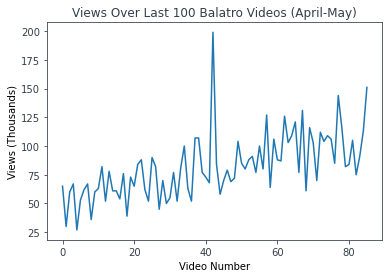

In [292]:
plt.plot(range(len(NL['Title'])),NL['Views']/1000)
plt.title('Views Over Last 100 Balatro Videos (April-May)')
plt.ylabel('Views (Thousands)')
plt.xlabel('Video Number')
plt.savefig('Views.png')

### Lets sort the dataframe by video length ascending and plot.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


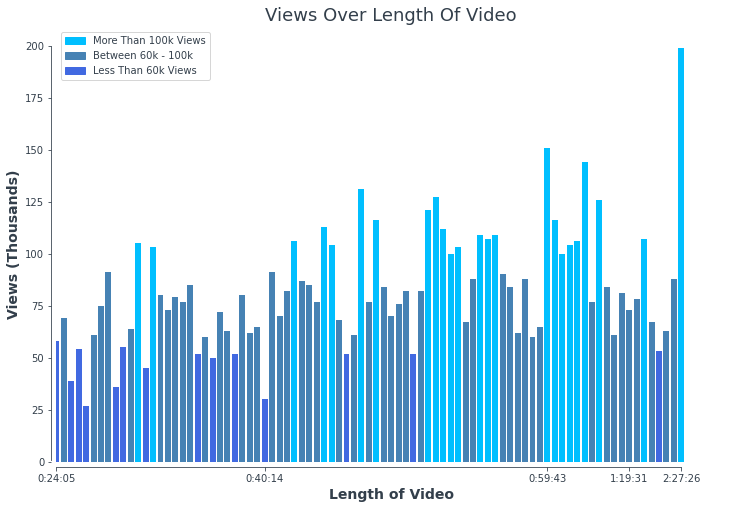

In [787]:
import matplotlib.patches as mpatches

#sort by video length
NL_time = NL.sort_values('Length',ignore_index=True)
NL_time['Length']

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

#add color to view thresholds
colorsValue = []
for value in NL_time['Views']:
    if value < 60000:
        colorsValue.append('royalblue')
    elif value >= 100000:
        colorsValue.append('deepskyblue')
    else:
        colorsValue.append('steelblue')

#plot
fig, ax = plt.subplots(figsize=(12,8))
plt.bar(NL_time['Length'],NL_time['Views']/1000, color=colorsValue)
plt.xlabel('Length of Video',fontsize=14, fontweight='black', color = '#333F4B')

#labels
plt.ylabel('Views (Thousands)',fontsize=14, fontweight='black', color = '#333F4B')
plt.title('Views Over Length Of Video', fontsize=18, color = '#333F4B')
ax.set_xticks([0,28, 66, 77, 84])
ax.set_xlim(0,90)

#legend for color mapping
pop_a = mpatches.Patch(color='deepskyblue', label='More Than 100k Views') 
pop_b = mpatches.Patch(color='steelblue', label='Between 60k - 100k') 
pop_c = mpatches.Patch(color='royalblue', label='Less Than 60k Views') 
plt.legend(handles=[pop_a,pop_b,pop_c]) 

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds((1, 200))
ax.spines['bottom'].set_bounds((0,84))
ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))

# plt.savefig('ViewsLength-blank.pdf', dpi=300, bbox_inches='tight')

## Next Steps: Find all the jokers used in the last 100 thumbnails and how often they occured.

In [782]:
# add rows of lists into one big list
lst = NL['Balatro Card'].explode().to_list()
jokers = pd.DataFrame(lst)

#calculate number of joker occurences
count = jokers.value_counts()
count

fortuneteller    10
campfire          8
constellation     7
duo               7
stuntman          7
                 ..
roughgem          1
onyxagate         1
facejoker         1
fourfingers       1
lusty             1
Length: 77, dtype: int64

### Let's see if we can plot this with a histogram or bar chart or something simple.

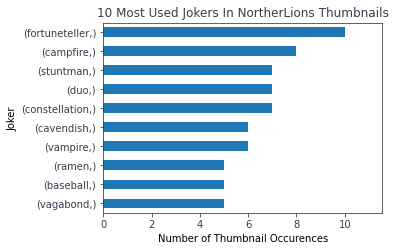

In [783]:
# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'


fig, ax = plt.subplots(figsize=(5,3.5))

jokers.value_counts()[:10].sort_values().plot(kind = 'barh',)
plt.xlabel('Number of Thumbnail Occurences')
plt.ylabel('Joker')
plt.title('10 Most Used Jokers In NortherLions Thumbnails')

plt.hlines(y=10, xmin=0, xmax=11, color='#007acc', alpha=0.2, linewidth=5)


### Clean up the graph and make it look presentable.

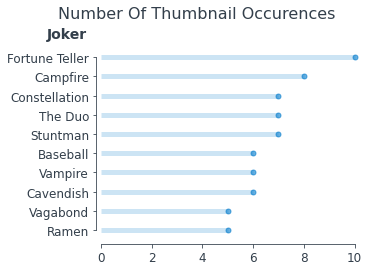

In [788]:
# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

#this is placeholder code from stackoverflow -updated in following barh plots below.
percentages = pd.Series([10, 8, 7, 7, 7, 6, 6, 6, 5, 5], 
                        index=['Fortune Teller', 'Campfire', 'Stuntman', 'The Duo', 
                               'Constellation', 'Cavendish', 'Vampire', 'Baseball', 'Ramen', 'Vagabond'])
df = pd.DataFrame({'percentage' : percentages})
df = df.sort_values(by='percentage')
my_range=list(range(1,len(df.index)+1))

#plot
fig, ax = plt.subplots(figsize=(5,3.5))

# create horizontal lines that starts at x = 0 and goes to value 
plt.hlines(y=my_range, xmin=0, xmax=df['percentage'], color='#007ACC', alpha=0.2, linewidth=5)

# add blue dot at each value
plt.plot(df['percentage'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('')
ax.set_ylabel('')
fig.text(0.007,1,'Number Of Thumbnail Occurences', fontsize=16, color = '#333F4B')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(-0.025, 0.92, 'Joker', fontsize=14, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, 10))
ax.spines['bottom'].set_bounds((0,10))
ax.set_xlim(0,11)

ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))

# plt.savefig('jokers.png', dpi=300, bbox_inches='tight')


## Lets look deeper at the joker information we have.
### Find all the jokers, how often they occured, average views when on thumbnail. Then store all jokers with their video's information (views, length, polychrome, negative) as values.

In [418]:
#make a list of all jokers, cards, or non-cards used
jokers_used = []
for x in range(86):
    for i in range(len(NL['Balatro Card'][x])):
        name = NL['Balatro Card'][x][i]
        if name not in jokers_used:
            jokers_used.append(name)
print(jokers_used)


['mecury', 'campfire', 'spacejoker', 'vagabond', 'fortuneteller', 'greenjoker', 'stuntman', 'blackboard', 'madness', '104', 'duo', 'money', 'creditcard', 'grosmichel', 'evenstevens', 'dna', 'triboulet', 'photograph', 'yorick', 'stencil', 'ceremonialdagger', 'cardsharp', 'tribe', 'ramen', 'cavendish', 'icecream/fourfingers/order', 'baseball', 'abstract', 'roughgem', 'constellation', 'shootthemoon', 'square', 'drunkard', 'socknbuskin', 'midasmask', 'facejoker', 'vampire', 'hack', 'bloodstone', 'steel', 'driverslicense', 'family', 'arrowhead', 'onyxagate', 'burglar', 'blueprint', 'acrobat', 'certificate', 'burntjoker', 'ridethebus', 'sparetrousers', 'raisedfist', 'tradingcard', 'wilyjoker', 'score', 'supernova', 'hologram', 'fourfingers', 'mime', 'rocket', 'wily', 'throwback', 'half', 'basbeall', 'sixthsense', 'egg', 'smeared', 'runner', 'shortcut', 'droll', 'chicot', 'trio', 'lusty', 'crafty', 'turtlebean', 'scholar', 'swashbuckler']



#### I kept it simple here. Lets just look at storing a Joker as a key and a list of their occuring video's views as values.

In [564]:
#Create dictionary with each joker as key and a list of views for each video they were in
joker_views = {}  # {mercury : [20000,34000]}

#iterate each video
for x in range(86):
#     print('Video (x)', x) #test loop for each video
    #iterate each joker included in thumbnail
    for i in range(len(NL['Balatro Card'][x])):
        name = NL['Balatro Card'][x][i]
#         print('Joker (i)',i)  #test loop for each card
        if name in joker_views:
            joker_views[name] += [NL['Views'][x]]
        if name not in joker_views:
            joker_views[name] = [NL['Views'][x]]

joker_views['baseball']


[61000, 62000, 73000, 109000, 151000]

#### Now we iterate through each joker in the joker_views dictionary and average their views across all features thumbnails.


In [501]:

joker_avgs = {}
for n in joker_views.keys():
    joker_avgs[n] = int(np.round(np.average(joker_views[n])))

joker_avgs


{'mecury': 65000,
 'campfire': 80375,
 'spacejoker': 30000,
 'vagabond': 65400,
 'fortuneteller': 89600,
 'greenjoker': 64500,
 'stuntman': 81714,
 'blackboard': 60000,
 'madness': 74000,
 '104': 72000,
 'duo': 87143,
 'money': 71667,
 'creditcard': 53000,
 'grosmichel': 53000,
 'evenstevens': 87000,
 'dna': 73000,
 'triboulet': 78500,
 'photograph': 76250,
 'yorick': 83500,
 'stencil': 73000,
 'ceremonialdagger': 86400,
 'cardsharp': 61750,
 'tribe': 55667,
 'ramen': 89600,
 'cavendish': 101667,
 'icecream/fourfingers/order': 78000,
 'baseball': 91200,
 'abstract': 79000,
 'roughgem': 61000,
 'constellation': 83429,
 'shootthemoon': 63000,
 'square': 54500,
 'drunkard': 60667,
 'socknbuskin': 78500,
 'midasmask': 76500,
 'facejoker': 84000,
 'vampire': 86500,
 'hack': 99000,
 'bloodstone': 75333,
 'steel': 86500,
 'driverslicense': 77000,
 'family': 83667,
 'arrowhead': 45000,
 'onyxagate': 45000,
 'burglar': 45000,
 'blueprint': 85500,
 'acrobat': 61000,
 'certificate': 107000,
 'bur

In [521]:
# create a DataFrame from the joker average views dictionary
joker_avgs_df = pd.DataFrame(joker_avgs.items(), columns=['Joker','Avg'])
joker_avgs_df = joker_avgs_df.sort_values('Avg',ascending=True)
joker_avgs_df[-10:]
# joker_avgs_df[-10:].to_csv('avgs_1.csv')

,Joker,Avg
24,cavendish,101667
69,droll,104000
63,basbeall,106000
70,chicot,106000
47,certificate,107000
71,trio,111333
67,runner,112000
68,shortcut,112000
54,score,121000
65,egg,131000


### Plot the top 10 jokers by the most views.

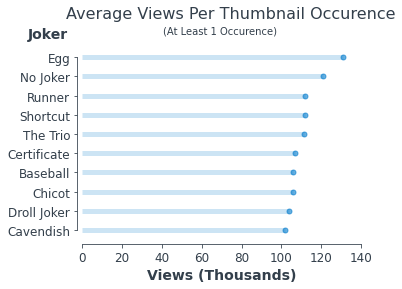

In [584]:
#plot top 10 jokers by most views
avgs_1 = pd.read_csv('joker avgs.csv')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(avgs_1.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=avgs_1['Avg']/1000, color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(avgs_1['Avg']/1000, my_range, "o", markersize=5, color='#007ACC', alpha=0.6)
# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, avgs_1['Joker'])
# plt.xticks(['Egg', 'No Joker Included','Shortcut','Runner','The Trio','Certificate','Chicot','Baseball','Droll Joker','Cavendish'])

# set labels
ax.set_xlabel('Views (Thousands)', fontsize=14, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

fig.text(0.08,1,'Average Views Per Thumbnail Occurence', fontsize=16, color = '#333F4B')
fig.text(0.35,.94,'(At Least 1 Occurence)', fontsize=10, color = '#333F4B')

# add an horizonal label for the y axis 
fig.text(-0.025, 0.92, 'Joker', fontsize=14, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, 10))
ax.spines['bottom'].set_bounds((0,140))
ax.set_xlim(0,140)

ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))

# plt.savefig('joker_avg_1.pdf', dpi=300, bbox_inches='tight')

### Now lets plot the top 10 jokers by the most views if they appear in more than one humbnail.

#### Compile list of jokers that occur more than once.

In [565]:
#save averages for jokers that appeared more than one time

joker_avgs2 = {}
for n in joker_views.keys():
    if len(joker_views[n]) > 1:
        joker_avgs2[n] = int(np.round(np.average(joker_views[n])))

joker_avgs2


{'campfire': 80375,
 'vagabond': 65400,
 'fortuneteller': 89600,
 'greenjoker': 64500,
 'stuntman': 81714,
 'madness': 74000,
 '104': 72000,
 'duo': 87143,
 'money': 71667,
 'evenstevens': 87000,
 'dna': 73000,
 'triboulet': 78500,
 'photograph': 76250,
 'yorick': 83500,
 'stencil': 73000,
 'ceremonialdagger': 86400,
 'cardsharp': 61750,
 'tribe': 55667,
 'ramen': 89600,
 'cavendish': 101667,
 'baseball': 91200,
 'abstract': 79000,
 'constellation': 83429,
 'shootthemoon': 63000,
 'square': 54500,
 'drunkard': 60667,
 'socknbuskin': 78500,
 'midasmask': 76500,
 'vampire': 86500,
 'hack': 99000,
 'bloodstone': 75333,
 'steel': 86500,
 'driverslicense': 77000,
 'family': 83667,
 'blueprint': 85500,
 'acrobat': 61000,
 'burntjoker': 78500,
 'ridethebus': 86000,
 'raisedfist': 89333,
 'score': 121000,
 'supernova': 85000,
 'rocket': 100500,
 'smeared': 71500,
 'trio': 111333}

#### Recreate an average dataframe consisting of only multiple occuring jokers.

In [568]:
# create a DataFrame from the joker average views dictionary
joker_avgs_df2 = pd.DataFrame(joker_avgs2.items(), columns=['Joker','Avg'])
joker_avgs_df2 = joker_avgs_df2.sort_values('Avg',ascending=True)
joker_avgs_df2.reset_index(drop=True)
joker_avgs_df2[-10:]
# joker_avgs_df2[-10:].to_csv('avgs_2.csv')

,Joker,Avg
7,duo,87143
38,raisedfist,89333
18,ramen,89600
2,fortuneteller,89600
20,baseball,91200
29,hack,99000
41,rocket,100500
19,cavendish,101667
43,trio,111333
39,score,121000


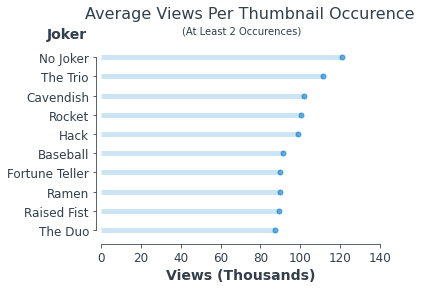

In [596]:
#plot top 10 jokers by most views
avgs_2 = pd.read_csv('joker avgs2.csv')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(avgs_2.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=avgs_2['Avg']/1000, color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(avgs_2['Avg']/1000, my_range, "o", markersize=5, color='#007ACC', alpha=0.6)
# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, avgs_2['Joker'])
# plt.xticks(['Egg', 'No Joker Included','Shortcut','Runner','The Trio','Certificate','Chicot','Baseball','Droll Joker','Cavendish'])

# set labels
ax.set_xlabel('Views (Thousands)', fontsize=14, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

fig.text(0.08,1,'Average Views Per Thumbnail Occurence', fontsize=16, color = '#333F4B')
fig.text(0.35,.94,'(At Least 2 Occurences)', fontsize=10, color = '#333F4B')

# add an horizonal label for the y axis 
fig.text(-0.025, 0.92, 'Joker', fontsize=14, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, 10))
ax.spines['bottom'].set_bounds((0,140))
ax.set_xlim(0,140)

ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))

# plt.savefig('joker_avg_2.pdf', dpi=300, bbox_inches='tight')

## Now let's look at card modifier impact on views.

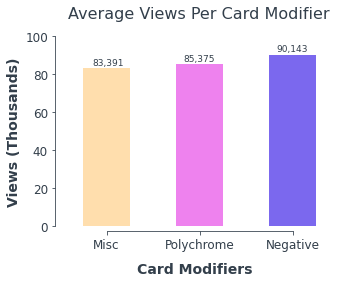

In [814]:
#Lets do a bar chart of the average views for a video if it includes a polychrome or negative joker
poly_views = [53000,67000,116000,109000,67000,82000,104000,85000]
poly_avg = 85375
neg_views = [84000,144000,65000,112000,91000,30000,105000]
neg_avg = 90143
my_range2=list(range(1,len(poly_neg_avg)+1))
poly_neg_avg = [83.391,85.375,90.143]
labels_bar = ['Misc','Polychrome','Negative']

fig, ax = plt.subplots(figsize=(5,3.5))
plt.bar(labels_bar,poly_neg_avg, width=0.5, color=['navajowhite','violet','mediumslateblue'])

ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks([0,20,40,60,80,100])
# plt.xticks(['Egg', 'No Joker Included','Shortcut','Runner','The Trio','Certificate','Chicot','Baseball','Droll Joker','Cavendish'])

# # set labels
fig.text(0.34,-0.06,'Card Modifiers', fontsize=14, fontweight='black', color = '#333F4B')
ax.set_ylabel('Views (Thousands)', fontsize=14, fontweight='black', color = '#333F4B')

fig.text(0.148,.95,'Average Views Per Card Modifier', fontsize=16, color = '#333F4B')
fig.text(0.216,.765,'83,391', fontsize=9, color = '#333F4B')
fig.text(0.467,.78,'85,375', fontsize=9, color = '#333F4B')
fig.text(0.727,.818,'90,143', fontsize=9, color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((0, 100))
ax.spines['bottom'].set_bounds((0,2))
ax.set_xlim(-0.5,2)
plt.xlim(None, 2.5)

ax.spines['left'].set_position(('outward', 5))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig('poly_neg_avg.png', dpi=300, bbox_inches='tight')

# If you read through this far thank you! Hope this was something interesting. Was super enjoyable and easy to do so I might do more of these in the future.

# -Ian